In [4]:
import numpy as np
import pandas as pd
# The statistical module used to run chi square test
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
csv1 = "Data/Behavioral_Risk_2011_clean.csv"

csv2 = "Data/CDC_STATE_System_E-Cigarette_Legislation_-_Tax.csv"

usage_df = pd.read_csv(csv1)
legis_first_df = pd.read_csv(csv2)
#usage_df.head()
legis_df = legis_first_df.drop_duplicates(subset=['ProvisionID', 'Enacted_Date', 'Effective_Date', 'LocationAbbr'], keep='first')
legis_df

FileNotFoundError: [Errno 2] File Data/CDC_STATE_System_E-Cigarette_Legislation_-_Tax.csv does not exist: 'Data/CDC_STATE_System_E-Cigarette_Legislation_-_Tax.csv'

In [ ]:
legis_drop_df = legis_df[legis_df.ProvisionValue !="No Provision"]
legis_count_df = legis_drop_df.groupby(['LocationAbbr']).agg({'ProvisionGroupDesc':'count'})
legis_count_df.sort_values(by=['ProvisionGroupDesc'], ascending=False).head()

In [ ]:
usage_clean_df = usage_df

usage_clean_df = usage_clean_df[usage_clean_df.MeasureDesc !="Frequency of Use"]
usage_clean_df = usage_clean_df[usage_clean_df.Gender !="Overall"]
usage_clean_df = usage_clean_df[usage_clean_df.Response !="Not Current"]
usage_clean_df = usage_clean_df[usage_clean_df.Response !="Former"]
usage_clean_df = usage_clean_df[usage_clean_df.Response !="Never"]

usage_clean_df = usage_clean_df[usage_clean_df.TopicDesc !="Cigarette Use_Adults"]
usage_clean_df = usage_clean_df[usage_clean_df.TopicDesc !="Smokeless Tobacco Use (Adults)"]
usage_clean_df = usage_clean_df[usage_clean_df.TopicDesc !="Cessation (Adults)"]

usage_clean_df.head()

In [ ]:
combo_df = pd.merge(left=usage_clean_df, right=legis_count_df, left_on='LocationAbbr', right_on='LocationAbbr')

merged_clean_df = combo_df.filter(['LocationAbbr', 'Data_Value', 'ProvisionGroupDesc'])
merged_final_df = merged_clean_df.groupby(['LocationAbbr'], as_index=False).mean()
#merged_final_df.sort_values(by='ProvisionGroupDesc', ascending=False)
top_legis = ['CA', 'DC', 'KS']
sample_df = merged_final_df.loc[merged_final_df['LocationAbbr'].isin(top_legis)]
population_df = merged_final_df
sample_list = sample_df['Data_Value']
population_list = population_df['Data_Value']
sample_df

In [ ]:

plt.subplot(2, 1, 1)
plt.scatter(range(len(population_list)), population_list, label="Population")
plt.scatter(range(len(sample_list)), sample_list, label="Sample")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(population_list, 20, density=True, alpha=0.7, label="Population")
plt.hist(sample_list, 20, density=True, alpha=0.7, label="Sample")
plt.axvline(population_list.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(sample_list.mean(), color='r', linestyle='dashed', linewidth=1)
plt.legend()

In [ ]:
stats.ttest_1samp(sample_list, population_list.mean())

In [ ]:
scatter = merged_final_df.plot.scatter(x='ProvisionGroupDesc',
                                      y='Data_Value',
                                      c='DarkBlue')

In [ ]:
combo2_df = pd.merge(left=usage_clean_df, right=legis_drop_df, left_on='LocationAbbr', right_on='LocationAbbr')
merged_type_df = combo2_df.groupby(['LocationAbbr', 'ProvisionDesc', 'ProvisionValue'], as_index=False).mean()
merged_typefilter_df = merged_type_df.filter(['LocationAbbr', 'Data_Value', 'ProvisionDesc', 'ProvisionValue'])
merged_typefilter_df
tax_value_df = merged_typefilter_df.loc[merged_typefilter_df['ProvisionDesc'] == "Percent Value"]
tax_value_df['ProvisionValue'] = tax_value_df['ProvisionValue'].astype(float)
tax_valuegroup_df = tax_value_df.groupby(['LocationAbbr'], as_index=False).mean()
tax_valuegroup_df.sort_values(by=['ProvisionValue'], ascending=False)

In [ ]:
top_tax = ['VT', 'MA', 'DC', 'MN']
sample_tax_df = tax_valuegroup_df.loc[tax_valuegroup_df['LocationAbbr'].isin(top_tax)]
population_df = merged_final_df
sample_tax_list = sample_tax_df['Data_Value']
population_list = population_df['Data_Value']
sample_tax_df

In [ ]:
plt.subplot(2, 1, 1)
plt.scatter(range(len(population_list)), population_list, label="Population")
plt.scatter(range(len(sample_tax_list)), sample_tax_list, label="Sample")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(population_list, 20, density=True, alpha=0.7, label="Population")
plt.hist(sample_tax_list, 20, density=True, alpha=0.7, label="Sample")
plt.axvline(population_list.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(sample_list.mean(), color='r', linestyle='dashed', linewidth=1)
plt.legend()

In [ ]:
stats.ttest_1samp(sample_tax_list, population_list.mean())

In [ ]:

# Create the dataframe with top 6 states and their laws and percentage of current e-cig users
top_states = pd.DataFrame({'States':['CA', 'DC', 'KS'], 
                    'Legislation':['5','6','6'], 
                           '% of E-Cig Users':['9.78','13.49','16.04']
                        
                          }) 
  
# Print the dataframe 
top_states

In [ ]:
#pie plot to show all states 
legis_count_df["ProvisionGroupDesc"].plot.pie()


In [ ]:
merged_typefilter_df
tax_whole_df = merged_typefilter_df.loc[merged_typefilter_df['ProvisionDesc'] == "E-Cigarette Tax ($ each)"]

#tax_valuegroup_df = tax_value_df.groupby(['LocationAbbr'], as_index=False).mean()
tax_whole_df.sort_values(by=['ProvisionValue'], ascending=False)


In [ ]:
top_eachtax = ['PR', 'UT', 'KY']
sample_eachtax_df = tax_whole_df.loc[tax_whole_df['LocationAbbr'].isin(top_eachtax)]
populationeach_df = merged_final_df
sample_each_list = sample_eachtax_df['Data_Value']
population_each__list = populationeach_df['Data_Value']
sample_eachtax_df

In [ ]:
plt.subplot(2, 1, 1)
plt.scatter(range(len(population_each__list)), population_each__list, label="Population")
plt.scatter(range(len(sample_each_list)), sample_each_list, label="Sample")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(population_each__list, 20, density=True, alpha=0.7, label="Population")
plt.hist(sample_each_list, 20, density=True, alpha=0.7, label="Sample")
plt.axvline(population_each__list.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(sample_each_list.mean(), color='r', linestyle='dashed', linewidth=1)
plt.legend()

In [21]:
stats.ttest_1samp(sample_each_list, population_each__list.mean())

Ttest_1sampResult(statistic=-0.2863839830490425, pvalue=0.8015245862355992)

In [1]:
#states = ['MN', 'NC', 'LA', 'DC', 'PA', 'WV']
top_df = population_df.nlargest(10, "ProvisionGroupDesc") 
top_df.style.format({"Data_Value": "{:20,.2f}"})
ax=sns.catplot(x='Data_Value',y='ProvisionGroupDesc',hue='LocationAbbr',kind='point',data=top_df)
ax.fig.autofmt_xdate()

NameError: name 'population_df' is not defined

Text(0.5, 1.0, 'E-CIGS')

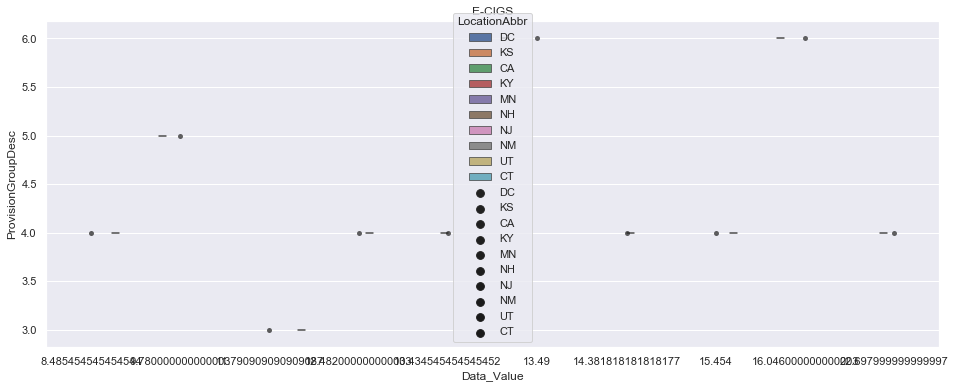

In [43]:
plt.figure(figsize=(16,6))
sns.violinplot(x='Data_Value',y='ProvisionGroupDesc',hue='LocationAbbr',data=top_df,inner=None)
sns.swarmplot(x='Data_Value',y='ProvisionGroupDesc',hue='LocationAbbr',data=top_df,color='k',alpha=0.7)
plt.title('E-CIGS')

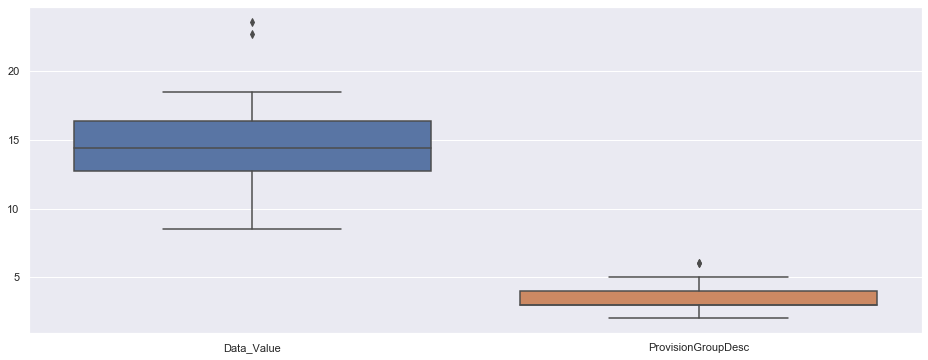

In [45]:
fig_dims=(16,6)
fix, ax=plt.subplots(figsize=fig_dims)
sns.boxplot(data=population_df)